In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q1. Deep Learning Model for Regression Using Keras
  1. Build a fully connected neural network (NN) using Keras that
    a: uses the 1-mer one-hot encoding as input
    b: has one hidden layer with 16 nodes and ReLu activation
    c: uses MSE as the loss function
    d: uses Adam as the optimizer
    e: Trains for 50 epochs
  2. Train the model and evaluate it using MSE on the test set
  3. Plot the learning history of the NN (training vs validation loss over epochs)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense,  BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, roc_curve, auc
import matplotlib.pyplot as plt
import random
import time

First 5 bound sequences:                          Sequence
0  AGAGCAAGTGTAAGTTCTTAGGCGCTCGAG
1  ACAGAATTAACTGCGGGCATCGCAAACCTG
2  GTTAACTCTGCATAACTCATTTTAGATGTT
3  TCCTGAATCTCGTCTGGACTAGGGACACTT
4  GAGCAAAAGGAAACTCAAAACATTGCTTCG
First 5 unbound sequences:                          Sequence
0  TCAACTTAGAGGGCACGTGGCGATCATATA
1  TACAGACTAGATTCACCCGAATAGTACCGA
2  CCATGCACTAAACCAGGTGTACGCTGAGAG
3  TGTCGACGTCAATCACGAGGGAGAGATACT
4  TCCAATAATAGGGCACACGGATAAAGGGGG


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 6.5297 - mse: 6.5297 - val_loss: 0.1560 - val_mse: 0.1560
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1179 - mse: 0.1179 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 8/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 9/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

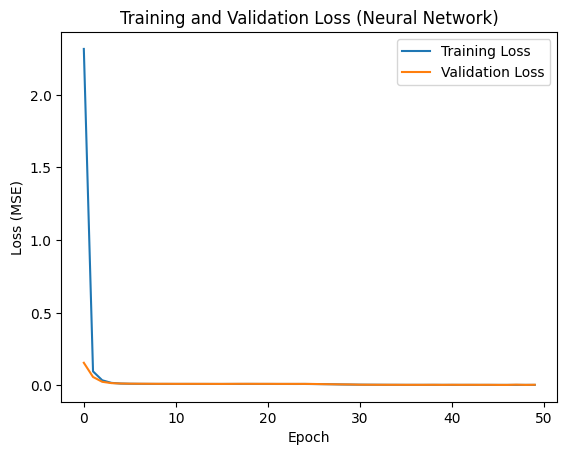

In [ ]:
bound_fasta = "/content/drive/My Drive/QBIO465/max_bound.fasta"
unbound_fasta = "/content/drive/My Drive/QBIO465/max_unbound.fasta"

# To read a fasta file
def read_fasta(path):
  with open(path, 'r') as file:
    sequences = [line.strip() for line in file if not line.startswith(">")]
  return pd.DataFrame(sequences, columns=["Sequence"])

# Reading the sequences from the FASTA files
bound_sequences = read_fasta(bound_fasta)
unbound_sequences = read_fasta(unbound_fasta)

# Checking to see if sequences loaded
print("First 5 bound sequences:", bound_sequences[:5])
print("First 5 unbound sequences:", unbound_sequences[:5])

# One-hot encoding for 1-mers
def ONEmer_encoding(sequences):
  bases = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1]}
  encoded = []
  for sequence in sequences:
    encoded_sequence = []
    for nucleotide in sequence:
      encoded_sequence.append(bases[nucleotide])
    # Flattens to a 2D array
    encoded.append(np.array(encoded_sequence).flatten())
  return np.array(encoded)

# Loading the data from Max.txt
def load_data(filename):
  sequences = []
  affinities = []
  with open(filename, 'r') as x:
    for line in x:
      sequence, affinity = line.strip().split()
      sequences.append(sequence)
      affinities.append(float(affinity))
  return sequences, np.array(affinities)

# Direct the file to pick from Drive
Max_txt = "/content/drive/My Drive/QBIO465/Max.txt"
sequences, affinities = load_data(Max_txt) # fix to path

# Split data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(sequences, affinities, test_size=0.2, random_state=42)

# Building neural network model
Xtrain_NN = ONEmer_encoding(Xtrain)
Xtrain_NN = np.array(Xtrain_NN)
Xtest_NN = ONEmer_encoding(Xtest)
Xtest_NN = np.array(Xtest_NN)

model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(Xtrain_NN.shape[1],)),
    keras.layers.Dense(1)
])

# Compiling, training, and evaluating the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(Xtrain_NN, ytrain, epochs=50, validation_split=0.1)
mse_best = model.evaluate(Xtest_NN, ytest)[0]
print(f'Mean Squared Error on Test Set: {mse_best}')

# Plotting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss (Neural Network)')
plt.show()

2. Comparison of Deep Learning Model with Linear Regression Model
  a: train three separate linear regression models one for each of the following k-mer representations:
    * 1-mer encoding
    * 2-mer encoding
    * 3-mer encoding
  b: compute and store the MSE for each model on the test set
  c: Create Bar Plot 1: Compare the MSE values of all four models, displaying MSE values on top of each bar:
    * Linear regression (1-mer)
    * Linear regression (2-mer)
    * Linear regression (3-mer)
    * Neural Network (1-mer initial)
  d: Create Bar Plot 2: show the number of features used for 1-mer, 2-mer, and 3-mer encoding.

Discussion:
* Effect of k on Linear Regression: How does increasing k affect linear regression performance? Based on Bar Plot 2, what could the possible disadvantages of using linear regression for higher k-mer values?


* Deep Learning vs Linear Regression: Does the neural network outperform all three linear regression models? Explain your findings and discuss the potential advantages or disadvantages of using deep learning for this task based on the observed results.

In [ ]:
# One-hot encoding for 2-mers
def TWOmer_encoding(sequences):
  bases = ['A', 'C', 'G', 'T']
  kmer_dict = {}
  index = 0

  for i in range(len(bases)):
    for j in range(len(bases)):
      kmer = bases[i] + bases[j]
      kmer_dict[kmer] = index
      index += 1
  encoded = []
  for sequence in sequences:
    encoded_sequence = [0] * len(kmer_dict)
    for i in range(len(sequence) - 1):
      kmer = sequence[i:i+2]
      if kmer in kmer_dict:
        encoded_sequence[kmer_dict[kmer]] = 1
    encoded.append(encoded_sequence)
  return np.array(encoded)

# One-hot encoding for 3-mers
def THREEmer_encoding(sequences):
  bases = ['A', 'C', 'G', 'T']
  kmer_dict = {}
  index = 0
  for i in range(len(bases)):
    for j in range(len(bases)):
      for k in range(len(bases)):
        kmer = bases[i] + bases[j] + bases[k]
        kmer_dict[kmer] = index
        index += 1
  encoded = []
  for sequence in sequences:
    encoded_sequence = [0] * len(kmer_dict)
    for i in range(len(sequence) - 2):
      kmer = sequence[i:i+3]
      if kmer in kmer_dict:
          encoded_sequence[kmer_dict[kmer]] = 1
    encoded.append(encoded_sequence)
  return np.array(encoded)


In [ ]:
# Linear regression for 1-mer
Xtrain_1mer = ONEmer_encoding(Xtrain)
Xtest_1mer = ONEmer_encoding(Xtest)
model_1mer = LinearRegression()
model_1mer.fit(Xtrain_1mer, ytrain)
y_pred1mer = model_1mer.predict(Xtest_1mer)
mse_1mer = mean_squared_error(ytest, y_pred1mer)
print(f"1-mer Linear Regression MSE: {mse_1mer}")

# Linear regression for 2-mer
Xtrain_2mer = TWOmer_encoding(Xtrain)
Xtest_2mer = TWOmer_encoding(Xtest)
model_2mer = LinearRegression()
model_2mer.fit(Xtrain_2mer, ytrain)
y_pred2mer = model_2mer.predict(Xtest_2mer)
mse_2mer = mean_squared_error(ytest, y_pred2mer)
print(f"2-mer Linear Regression MSE: {mse_2mer}")

# Linear regression for 3-mer
Xtrain_3mer = THREEmer_encoding(Xtrain)
Xtest_3mer = THREEmer_encoding(Xtest)
model_3mer = LinearRegression()
model_3mer.fit(Xtrain_3mer, ytrain)
y_pred3mer = model_3mer.predict(Xtest_3mer)
mse_3mer = mean_squared_error(ytest, y_pred3mer)
print(f"3-mer Linear Regression MSE: {mse_3mer}")

1-mer Linear Regression MSE: 0.009303328572790856
2-mer Linear Regression MSE: 0.038512494320603205
3-mer Linear Regression MSE: 0.021976994792970418


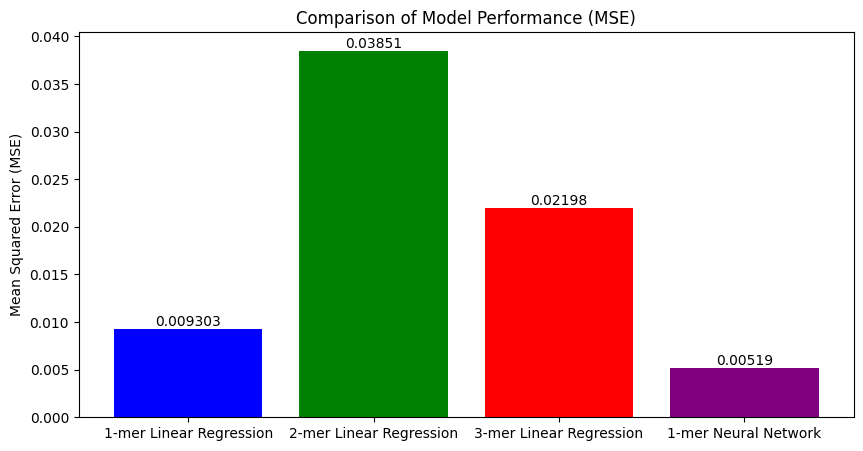

<function matplotlib.pyplot.show(close=None, block=None)>

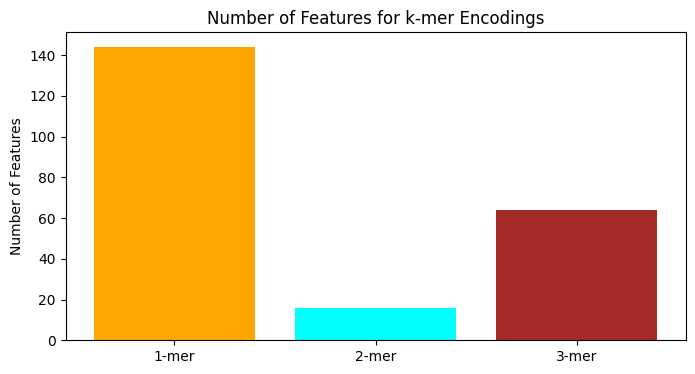

In [ ]:
# MSE Bar Plot 1
mse_values = [mse_1mer, mse_2mer, mse_3mer, mse_best] # mse[0] is the NN MSE from Q1
model_names = ['1-mer Linear Regression', '2-mer Linear Regression', '3-mer Linear Regression', '1-mer Neural Network']
plt.figure(figsize=(10,5))
plt.bar(model_names, mse_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Model Performance (MSE)')
for i, mse in enumerate(mse_values):
  plt.text(i, mse, f'{mse:.4}', ha='center', va='bottom')
plt.show()

# MSE Bar Plot 2
features_count = [Xtrain_1mer.shape[1], Xtrain_2mer.shape[1], Xtrain_3mer.shape[1]]
feature_names = ['1-mer', '2-mer', '3-mer']
plt.figure(figsize=(8,4))
plt.bar(feature_names, features_count, color=['orange', 'cyan', 'brown'])
plt.ylabel('Number of Features')
plt.title('Number of Features for k-mer Encodings')
plt.show

Discussion:
* Effect of k on Linear Regression: How does increasing k affect linear regression performance? Based on Bar Plot 2, what could the possible disadvantages of using linear regression for higher k-mer values?
  The 1-mer model has the lowest MSE with the 2-mer model having the highest MSE and the 3-mer is in between the two. Based on bar plot 2, the possible disadvantages of using linear regression for higher k-mer values is risk of overfitting, sparsity in the data, and increased computing complexity.


* Deep Learning vs Linear Regression: Does the neural network outperform all three linear regression models? Explain your findings and discuss the potential advantages or disadvantages of using deep learning for this task based on the observed results.
Yes, the 1-mer neural network outperforms all of the other linear regression models with an MSE of 0.004311. The 1-mer representation works best for both the neural networks and linear regression with the k-mer sizes we tested. We can use deep learning because of its ability to decipher complex patterns and learning hierarchical representations of the input data. Some disagvantages of deep learning is the data requirements along with hyperparameter finetuning.

Q3: Improving Deep Learning Model with Hyperparameter Tuning
  Start with the NN model in Q2 then optimize it using hyperparameter tuning. The goal is to find the best-performing model and compare it with the regression models. The hyperparameter search may require a long execution time.
  a: Tune the following hyperparameters
    * Number of hidden layers: [1,2,3]
    * Nodes per layer: [16,64,128]
    * Batch size: [8,32,256]
    * Batch normalization: [Yes, No]
    * Dropout rate: [0, 0.1, 0.5, 0.9]
  b: to reduce execution time, perform hyperparameter search using only 20% of the training data, randomly selected instead of the full training dataset and run 20 epochs for each search
  c: report the ebst parameters found from the hyperparameter search
  d: Create Box Plot 1: Show model performance for different hyperparameter settings. The x-axis represents the hyperparameters and the y-axis represents MSE. The same type of hyperparamters should have the same box color or be highlighted clearly for better readability
  e: With the best parameters, rebuild the model using the full training data
  f: Extend Bar Plot 1 to include the best deep learning model along with the other four models.

  Discussion:
    * How do hyperparameters affect performance based on Box Plot 1? Explain specifically what you observe in the box plot when comparing different hyperparemeters and the possible reasons behind these trends.
    * Did the deep learning model get improved and outperform the other linear regression models? Explain your findings and provide reasons to support your conclusion.

In [ ]:
def create_model(num_hidden_layers, nodes_per_layer, batch_normalization, dropout_rate):
  model = Sequential()
  model.add(Dense(nodes_per_layer, activation='relu', input_shape=(Xtrain_sampled.shape[1],)))
  for _ in range(num_hidden_layers - 1):
    model.add(Dense(nodes_per_layer, activation='relu'))
    if batch_normalization:
      model.add(BatchNormalization())
    if dropout_rate > 0:
      model.add(Dropout(dropout_rate))
  # Output layer
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mse'])
  return model

# Hyperparameter grid
num_hidden_layers_list = [1, 2, 3]
nodes_per_layer_list = [16, 64, 128]
batch_size_list = [8, 32, 256]
batch_normalization_list = [True, False]
dropout_rate_list = [0, 0.1, 0.5, 0.9]
results = []

# Calculate total number of iterations in the hyperparameter grid
total_iterations = (len(num_hidden_layers_list) * len(nodes_per_layer_list) *
                    len(batch_size_list) * len(batch_normalization_list) *
                    len(dropout_rate_list))
iteration = 0

results = []

# Using 20% of training data
num_samples = int(0.2 * len(Xtrain_NN))
random_indices = random.sample(range(len(Xtrain_NN)), num_samples)
Xtrain_sampled = Xtrain_NN[random_indices]
ytrain_sampled = ytrain[random_indices]

start_time = time.time()

# Searching the hyperparameter loop
for num_hidden_layers in num_hidden_layers_list:
  for nodes_per_layer in nodes_per_layer_list:
    for batch_size in batch_size_list:
      for batch_normalization in batch_normalization_list:
        for dropout_rate in dropout_rate_list:
          iteration += 1
          iter_start = time.time()

          # Creating and training model
          model = create_model(num_hidden_layers, nodes_per_layer, batch_normalization, dropout_rate)
          history = model.fit(Xtrain_sampled, ytrain_sampled, epochs=10, batch_size=batch_size, verbose=0)
          mse_val = model.evaluate(Xtrain_sampled, ytrain_sampled, verbose=0)[0]
          # Storing the results
          results.append({
              'num_hidden_layers' : num_hidden_layers,
              'nodes_per_layer' : nodes_per_layer,
              'batch_size' : batch_size,
              'batch_normalization' : batch_normalization,
              'dropout_rate' : dropout_rate,
              'mse' : mse_val
          })
          iter_end = time.time()
          elapsed = iter_end - start_time
          overall_elapsed = iter_end - start_time
          print(f"Iteration {iteration}/{total_iterations} | "
                f"Params: layers={num_hidden_layers}, nodes={nodes_per_layer}, "
                f"batch_size={batch_size}, BN={batch_normalization}, dropout={dropout_rate} | "
                f"MSE: {mse_val:.4f} | Iter time: {elapsed:.2f}s | Total elapsed: {overall_elapsed/60:.2f} min")

          tf.keras.backend.clear_session()

print("Best NN Hyperparameters:", min(results, key=lambda x: x['mse']))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Iteration 1/216 | Params: layers=1, nodes=16, batch_size=8, BN=True, dropout=0 | MSE: 0.0105 | Iter time: 8.17s | Total elapsed: 0.14 min
Iteration 2/216 | Params: layers=1, nodes=16, batch_size=8, BN=True, dropout=0.1 | MSE: 0.0095 | Iter time: 15.34s | Total elapsed: 0.26 min
Iteration 3/216 | Params: layers=1, nodes=16, batch_size=8, BN=True, dropout=0.5 | MSE: 0.0098 | Iter time: 23.90s | Total elapsed: 0.40 min
Iteration 4/216 | Params: layers=1, nodes=16, batch_size=8, BN=True, dropout=0.9 | MSE: 0.0101 | Iter time: 30.81s | Total elapsed: 0.51 min
Iteration 5/216 | Params: layers=1, nodes=16, batch_size=8, BN=False, dropout=0 | MSE: 0.0123 | Iter time: 39.80s | Total elapsed: 0.66 min
Iteration 6/216 | Params: layers=1, nodes=16, batch_size=8, BN=False, dropout=0.1 | MSE: 0.0100 | Iter time: 48.31s | Total elapsed: 0.81 min
Iteration 7/216 | Params: layers=1, nodes=16, batch_size=8, BN=False, dropout=0.5 | MSE: 0.0095 | Iter time: 55.84s | Total elapsed: 0.93 min
Iteration 8/216

Best Hyperparameters: {'num_hidden_layers': 1, 'nodes_per_layer': 128, 'batch_size': 8, 'batch_normalization': False, 'dropout_rate': 0, 'mse': 0.003968957345932722}


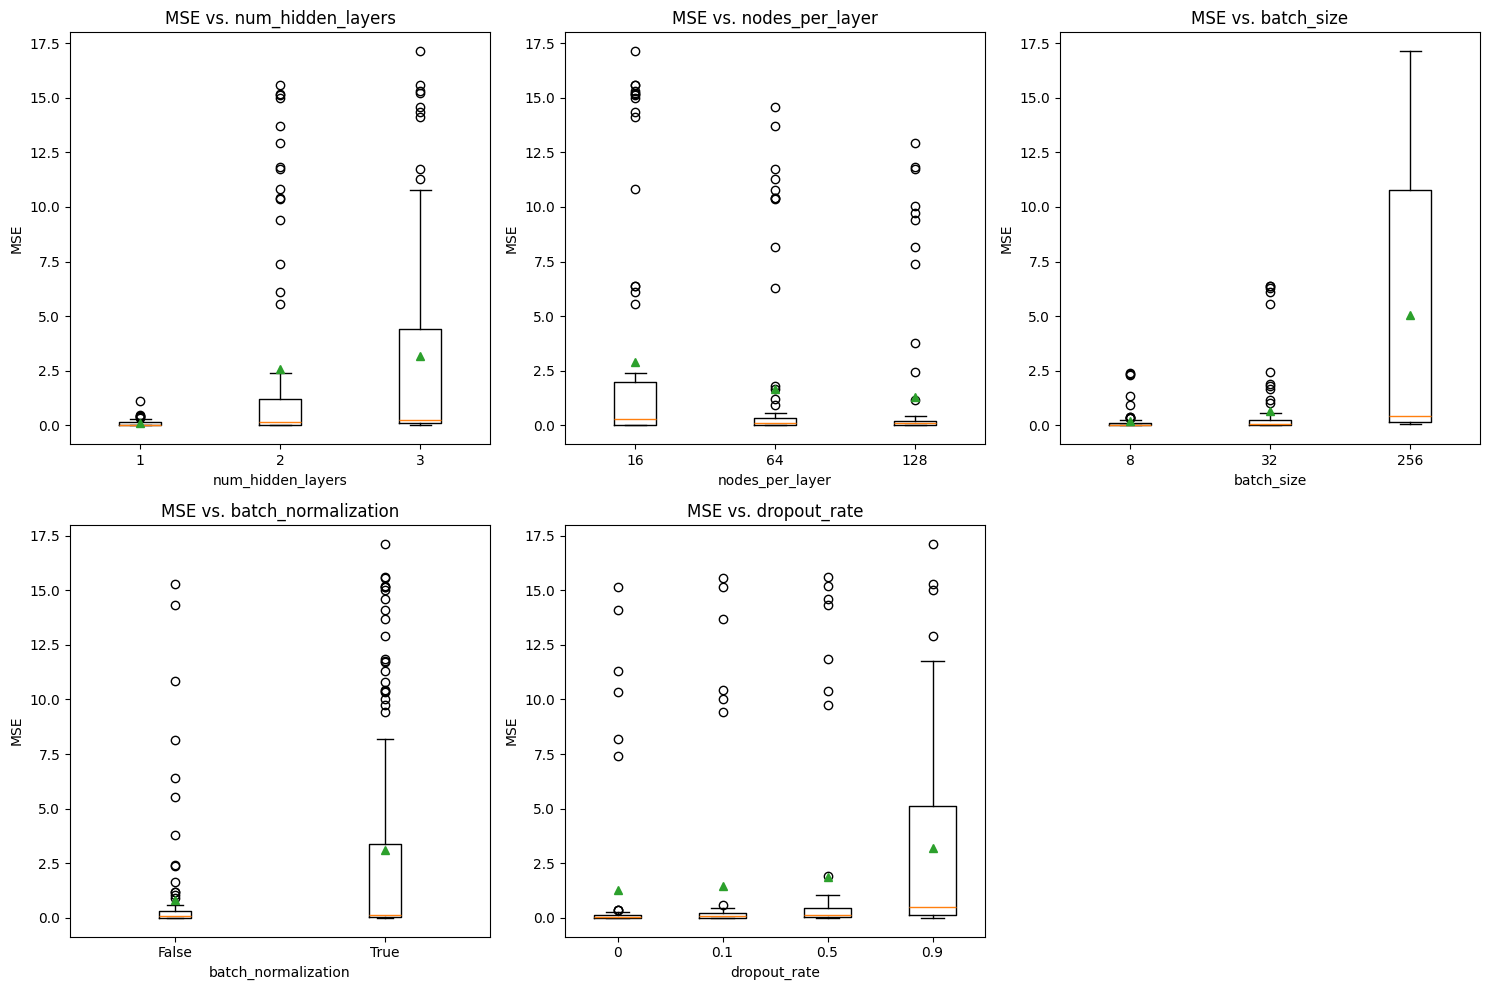

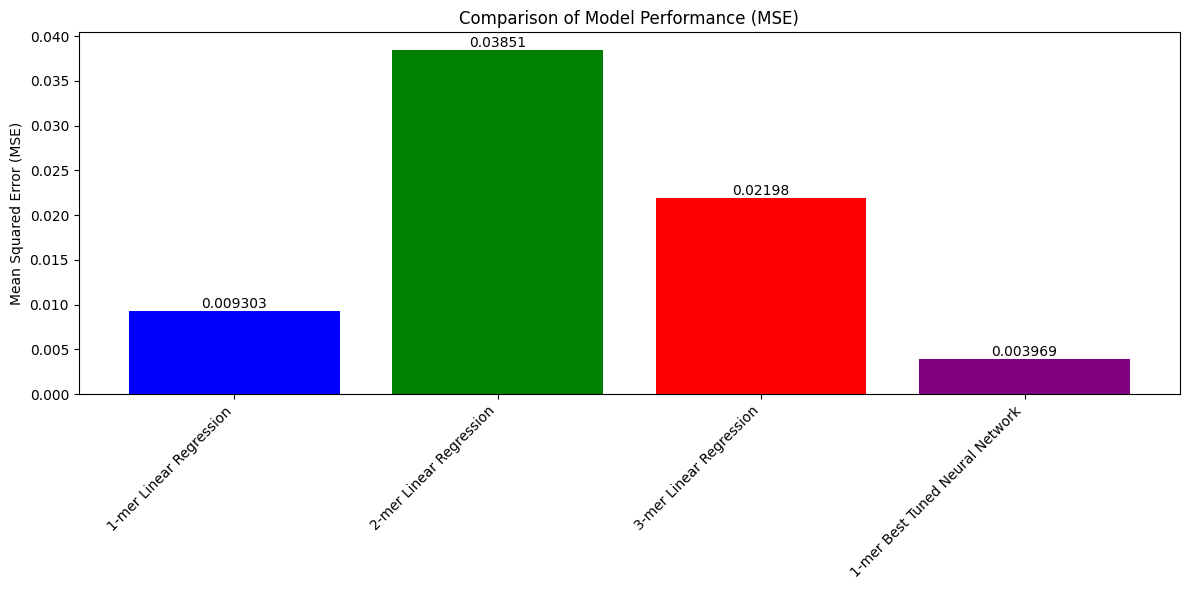

In [ ]:
# Reporting
best_parameters = min(results, key=lambda x: x['mse'])
mse_best = best_parameters['mse']
print("Best Hyperparameters:", best_parameters)
# Box plot here
box_plot_data = {}
for parameter_name in ['num_hidden_layers', 'nodes_per_layer', 'batch_size', 'batch_normalization', 'dropout_rate']:
  box_plot_data[parameter_name] = []

for result in results:
  for parameter_name in box_plot_data.keys():
    box_plot_data[parameter_name].append(result[parameter_name])

# MSE values for reference
box_plot_data['mse'] = [result['mse'] for result in results]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes = axes.flatten()

i=0
for parameter_name, values in box_plot_data.items():
  if parameter_name == 'mse':
    continue
  unique_values = sorted(list(set(box_plot_data[parameter_name])))
  mse_values = [
      [results[j]['mse'] for j in range(len(results)) if results[j][parameter_name] == val]
      for val in unique_values
  ]
  axes[i].boxplot(mse_values, positions=range(len(unique_values)), showmeans=True)
  axes[i].set_xticks(range(len(unique_values)))
  axes[i].set_xticklabels(unique_values)
  axes[i].set_xlabel(parameter_name)
  axes[i].set_ylabel('MSE')
  axes[i].set_title(f'MSE vs. {parameter_name}')
  i += 1

for j in range(i, len(axes)):
  axes[j].set_visible(False)
plt.tight_layout()
plt.show()

# Extending bar plot
mse_values = [mse_1mer, mse_2mer, mse_3mer, mse_best] # mse[0] is the NN MSE from Q1
model_names = ['1-mer Linear Regression', '2-mer Linear Regression', '3-mer Linear Regression', '1-mer Best Tuned Neural Network']
plt.figure(figsize=(12,6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Model Performance (MSE)')
for i, mse in enumerate(mse_values):
  plt.text(i, mse, f'{mse:.4}', ha='center', va='bottom')
plt.xticks(rotation=45, ha='right') # rotating x-axis
plt.tight_layout()
plt.show()

Discussion:
1. From the box plots, more hidden layers, bigger nodes, and a very high dropout often increase MSE or produce more variability, likely from overfitting or training instability. On the other hand, moderate dropout and batch normalization helps stabilize training and lower MSE. Overall, carefully chosen hyperparameters lead to more consistent and lower error scores.

2. Even after tuning, the NN didn't surpass the linear regression models, particularly the 1-mer regression which got the lowest MSE. This suggests that for this dataset and feature encoding the simpler linear approach more effectively captured the relationships than the deep learning model.

Q4: Build a NN for DNA Sequence Classification
  In this task you will classify TF-DNA binding sequences as bound or unbound using a NN and logistic regression.
  a: Design a NN model for DNA sequence classification
    * Use 1-mer sequence input for the NN
    * Perform hyperparameter search (define your own search space) to find the best parameters
    * Based of the best parameters, build a tuned NN model
  b: Train a logistic regression model
    * Use 3-mer encoding as input for logistic regression
  c: Model comparison
    * Compare the NN and logistic regression in terms of AUROC
    * Plot the AUROC curves for both models

Discussion:
  * Explain your findings based on AUROC scores and the AUROC curves.
  * Discuss the strengths and weaknesses of NN vs Logistic Regression for this classification task

In [ ]:
def createNNmodel(num_hidden_layers, nodes_per_layer, batch_normalization, dropout_rate):
  model = Sequential()
  model.add(Dense(nodes_per_layer, activation='relu', input_shape=(Xtrain_NN.shape[1],)))
  for _ in range(num_hidden_layers - 1):
    model.add(Dense(nodes_per_layer, activation='relu'))
    if batch_normalization:
      model.add(BatchNormalization())
    if dropout_rate > 0:
      model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
  return model

# Hyperparameter grid
num_hidden_layers_list = [1, 2, 3]
nodes_per_layer_list = [16, 64, 128]
batch_size_list = [8, 32, 256]
batch_normalization_list = [True, False]
dropout_rate_list = [0, 0.1, 0.5, 0.9]
best_auc = -1.0
best_parameters = None
n_trials = 30
random_combinations = [
    {
        'num_hidden_layers': random.choice(num_hidden_layers_list),
        'nodes_per_layer': random.choice(nodes_per_layer_list),
        'batch_size': random.choice(batch_size_list),
        'batch_normalization': random.choice(batch_normalization_list),
        'dropout_rate': random.choice(dropout_rate_list)
    }
    for _ in range(n_trials)
]

start_time = time.time()
total_iterations = n_trials
iteration = 0

early_stopping = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)

for params in random_combinations:
  iteration += 1
  iter_start = time.time()

  model = createNNmodel(params['num_hidden_layers'], params['nodes_per_layer'], params['batch_normalization'], params['dropout_rate'])
  model.fit(Xtrain_NN, ytrain, epochs=5, batch_size=params['batch_size'], verbose=0, callbacks=[early_stopping])
  loss_value, auc_value = model.evaluate(Xtest_NN, ytest, verbose=0)

  iter_end = time.time()
  elapsed = iter_end - iter_start
  overall_elapsed = iter_end - start_time
  # DEBUG
  print(f"Iteration {iteration}/{total_iterations} | Params: {params} | AUC: {auc_value:.4f} | Iteration Time: {elapsed:.2f}s | Total Elapsed: {overall_elapsed:.2f}s")
  if auc_value > best_auc:
    best_auc = auc_value
    best_parameters = params
  tf.keras.backend.clear_session()

print("Best NN Hyperparameters:", best_parameters)

upgradedNNmodel = createNNmodel(best_parameters['num_hidden_layers'],
                                best_parameters['nodes_per_layer'],
                                best_parameters['batch_normalization'],
                                best_parameters['dropout_rate'])
upgradedNNmodel.fit(Xtrain_NN, ytrain, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Iteration 1/30 | Params: {'num_hidden_layers': 1, 'nodes_per_layer': 16, 'batch_size': 8, 'batch_normalization': True, 'dropout_rate': 0.9} | AUC: 0.0000 | Iteration Time: 14.30s | Total Elapsed: 14.30s
Iteration 2/30 | Params: {'num_hidden_layers': 3, 'nodes_per_layer': 16, 'batch_size': 8, 'batch_normalization': True, 'dropout_rate': 0.1} | AUC: 0.0000 | Iteration Time: 18.79s | Total Elapsed: 34.84s
Iteration 3/30 | Params: {'num_hidden_layers': 3, 'nodes_per_layer': 16, 'batch_size': 32, 'batch_normalization': True, 'dropout_rate': 0.9} | AUC: 0.0000 | Iteration Time: 11.73s | Total Elapsed: 48.25s
Iteration 4/30 | Params: {'num_hidden_layers': 1, 'nodes_per_layer': 128, 'batch_size': 32, 'batch_normalization': False, 'dropout_rate': 0.1} | AUC: 0.0000 | Iteration Time: 9.65s | Total Elapsed: 59.62s
Iteration 5/30 | Params: {'num_hidden_layers': 1, 'nodes_per_layer': 16, 'batch_size': 32, 'batch_normalization': False, 'dropout_rate': 0.1} | AUC: 0.0000 | Iteration Time: 7.45s | Tot

Unique ytrain_binary values: [0 1]
Unique ytrain values: [3.60314437 3.61930208 3.62169546 ... 4.7819061  4.82031314 4.86328121]
Unique ytrain_discrete values: [0 1]
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
NN AUC: 0.5
Logistic Regression AUC: 0.8153624621789554


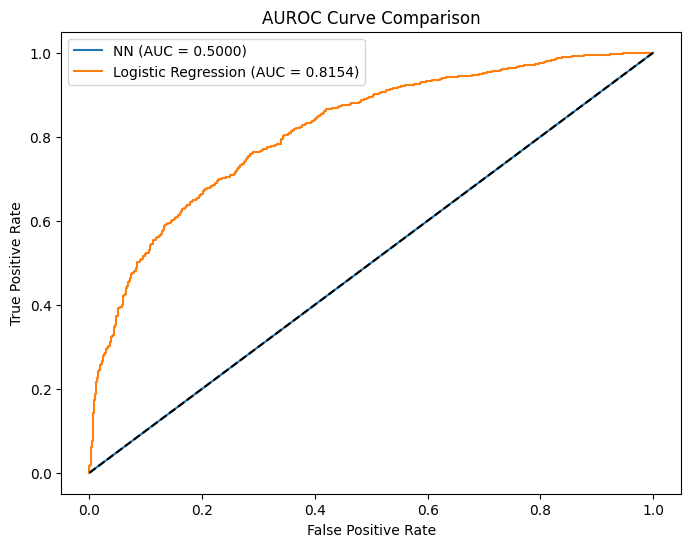

In [ ]:
# Regression
# 3mer
Xtrain_lr = THREEmer_encoding(Xtrain)
Xtest_lr = THREEmer_encoding(Xtest)

# Determining new threshold
threshold = np.median(ytrain)
ytrain_binary = (ytrain > threshold).astype(int)
ytest_binary = (ytest > threshold).astype(int)
print("Unique ytrain_binary values:", np.unique(ytrain_binary))

# Debug: Check the original label distribution
print("Unique ytrain values:", np.unique(ytrain))

ytrain_discrete = (ytrain > threshold).astype(int)
print("Unique ytrain_discrete values:", np.unique(ytrain_discrete))

# Ensure there are at least two classes present
if len(np.unique(ytrain_discrete)) < 2:
  raise ValueError("After thresholding, ytrain contains only one class. Please check your data.")

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(Xtrain_lr, ytrain_binary)
# Comparing models, predictions
NNpredictions = upgradedNNmodel.predict(Xtest_NN).flatten()
NN_fpr, NN_tpr, _ = roc_curve(ytest_binary, NNpredictions)
NN_auc = auc(NN_fpr, NN_tpr)
# regression predictions
lr_preds = lr_model.predict_proba(Xtest_lr)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(ytest_binary, lr_preds)
lr_auc = auc(lr_fpr, lr_tpr)
print("NN AUC:", NN_auc)
print("Logistic Regression AUC:", lr_auc)

#plotting
plt.figure(figsize=(8,6))
plt.plot(NN_fpr, NN_tpr, label=f'NN (AUC = {NN_auc:.4f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.4f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve Comparison')
plt.legend()
plt.show()

Discussion:
1. The logistic regression classifier outperforms the current NN because the NN is essentially guessing randomly (0.5) whereas the logisitic regression has an AUROC ~0.815. In this setup the regression captures the data patterns better than the NN, this may be my fault due to not optimal hyperparameters for the NN, not training it on enough data, or not preprocessing correctly.


2. Neural networks can learn complex, non-linear relationships with enough data and tuning, but they are prone to overfitting and the hyperparameter selection must be careful. Logistic regression is simpler, requires less data, and is more easily interpretable, but can fail to capture highly non-linear patterns.

In [5]:
#!pip install
!jupyter nbconvert --to html "/content/drive/MyDrive/QBIO465/SEB QBIO465 HW 3.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/QBIO465/SEB QBIO465 HW 3.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 764997 bytes to /content/drive/MyDrive/QBIO465/SEB QBIO465 HW 3.html
